In [1]:
from project_heart.lv import LV
import numpy as np
import pyvista as pv
pv.set_jupyter_backend("pythreejs")

import os
from pathlib import Path

from project_heart.enums import *

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Create speckles

In [3]:
lv = LV.from_file(filepath)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

Create Longitudinal Speckles

In [4]:
import logging

for i, a in enumerate(np.linspace(0, np.pi, 6, endpoint=False)):
    
    spk = lv.create_speckles(
        collection="long-6",
        group="endo",
        name=str(i),
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="long-6",
        group="epi",
        name=str(i),
        from_nodeset=LV_SURFS.EPI,
        d=2.4,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("long-6", spk_collection="long-6")
lv.plot(
    scalars="long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 0
INFO:create_speckles:group: endo
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 0
INFO:create_speckles:group: epi
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 1
INFO:create_speckles:group: endo
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 1
INFO:create_speckles:group: epi
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 2
INFO:create_speckles:group: endo
INFO:create_speckles:collection:

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [5]:
lv.set_region_from_speckles("TEST", spk_name="0", spk_group="endo", spk_collection="long-6")
lv.plot(
    scalars="TEST", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [6]:
import logging
names = ["subapex", "apex", "superapex", "submid", "mid", "supermid", "subbase", "base", "superbase"]

for i, a in enumerate(np.linspace(0.2, 1.0, len(names), endpoint=False)):
    
    spk = lv.create_speckles(
        collection="circ-6",
        group="endo",
        name=names[i],
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="circ-6",
        group="epi",
        name=names[i],
        from_nodeset=LV_SURFS.EPI,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("circ-6", spk_collection="circ-6")
lv.plot(
    scalars="circ-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: subapex
INFO:create_speckles:group: endo
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: subapex
INFO:create_speckles:group: epi
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: apex
INFO:create_speckles:group: endo
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: apex
INFO:create_speckles:group: epi
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: superapex
INFO:create_speckles:group: endo
INFO:c

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Metrics

## Clinical Metrics:

### Clinical metrics that do not require speckles

Ejection Fraction

Spks-data relationship not found for metric volumetric_fraction. Check 'set_data_spk_rel' or 'add_spk_data'.


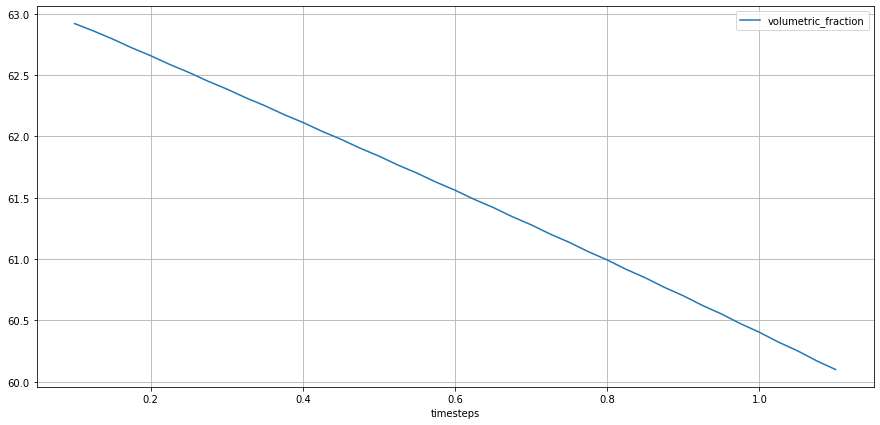

In [7]:
lv.ejection_fraction()
lv.plot_metric(lv.STATES.EF, 
    from_ts=0.1,
    plot_infos=["group"])

Longitudinal Shortening:

Spks-data relationship not found for metric longitudinal_shortening. Check 'set_data_spk_rel' or 'add_spk_data'.


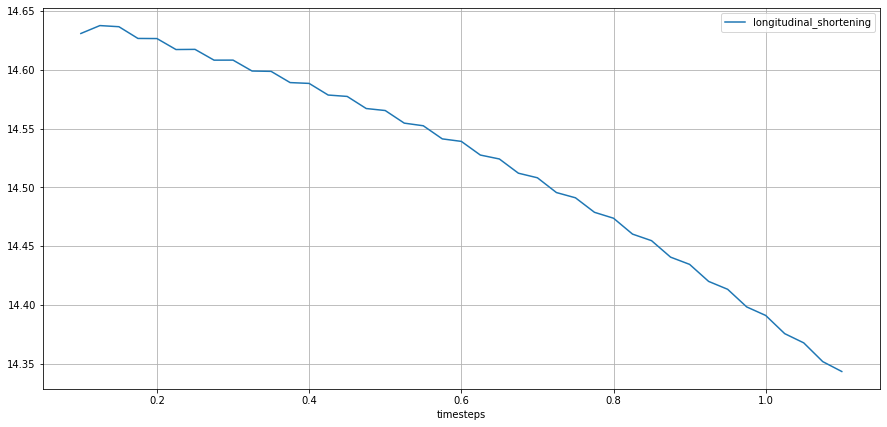

In [8]:
lv.longitudinal_shortening()
lv.plot_metric(lv.STATES.LS, 
    from_ts=0.1,
    plot_infos=["group"])

### Clinical metrics that require speckles

Radial shortening


INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIUS'
DEBUG:LV.BaseMetricsComputations:Reducing metric by group for 'LV_STATES.RADIUS'
INFO:LV.BaseMetricsComputations:Metric 'LV_STATES.RADIUS' has reduced values by group.
DEBUG:LV.BaseMetricsComputations:Reducing metric by name for 'LV_STATES.RADIUS'
INFO:LV.BaseMetricsComputations:Metric 'LV_STATES.RADIUS' has reduced values by names.
DEBUG:LV.BaseMetricsComputations:Reducing metric by group and name for 'LV_STATES.RADIUS'
INFO:LV.BaseMetricsComputations:Metric 'LV_STATES.RADIUS' has reduced values by group and name.


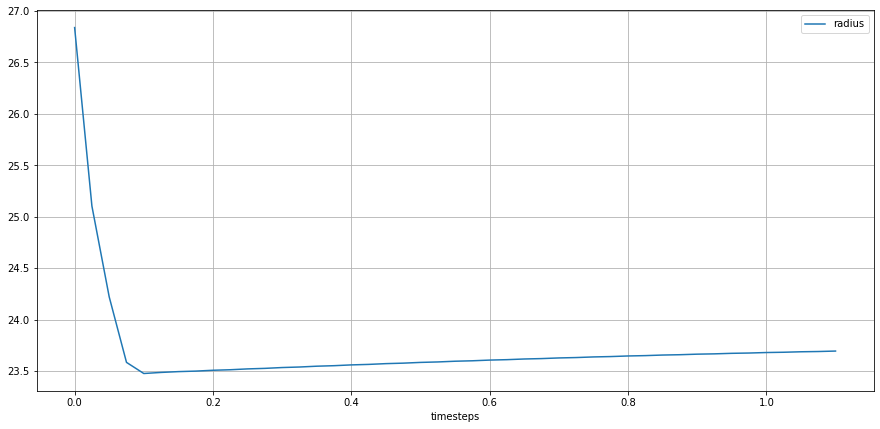

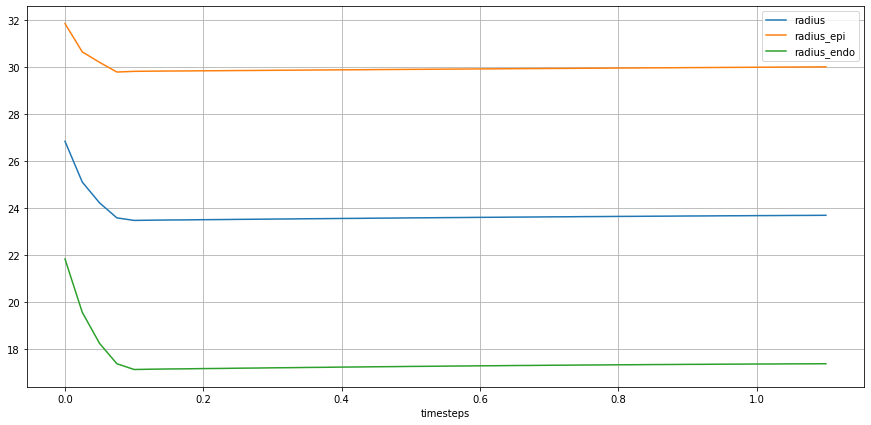

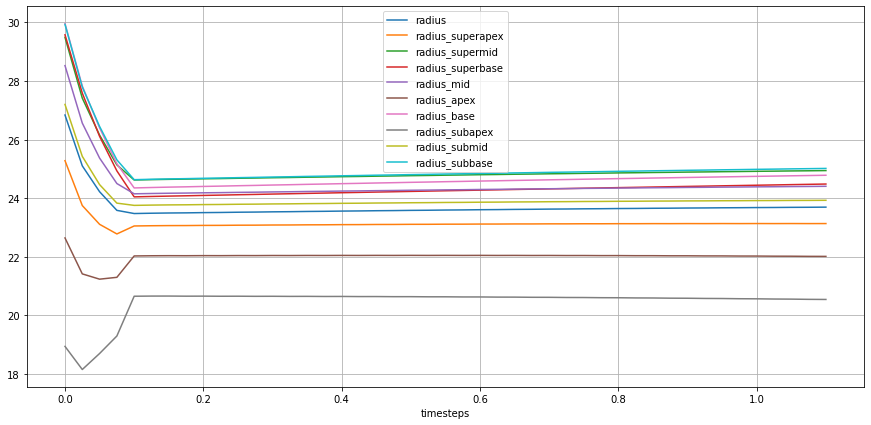

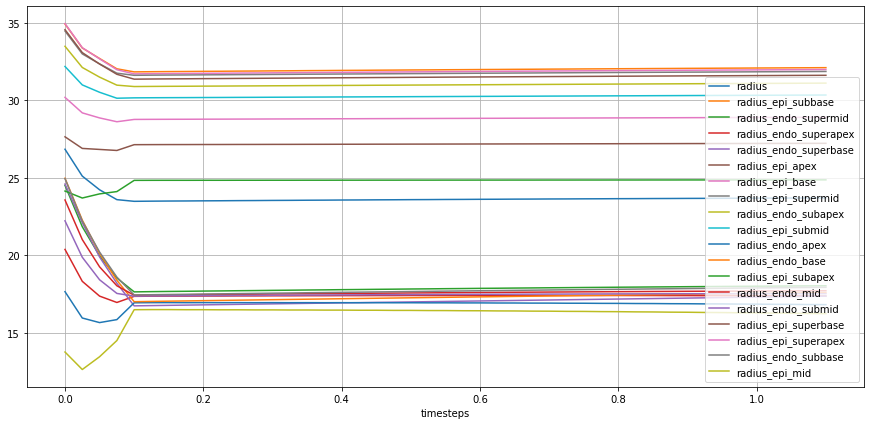

In [9]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.radius(circ_spks, recompute=True, reduce_by={"group", "name", "group_name"})
lv.plot_metric(lv.STATES.RADIUS, 
    from_ts=0.0,
    plot_infos=["group", "name", "group_name"])

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIUS'
DEBUG:LV.BaseMetricsComputations:Reducing metric by name for 'LV_STATES.RADIUS'
INFO:LV.BaseMetricsComputations:Metric 'LV_STATES.RADIUS' has reduced values by names.
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.RADIAL_SHORTENING'
DEBUG:LV.BaseMetricsComputations:Reducing metric by name for 'LV_STATES.RADIAL_SHORTENING'
INFO:LV.BaseMetricsComputations:Metric 'LV_STATES.RADIAL_SHORTENING' has reduced values by names.


suffix 'epi' not found for metric 'radial_shortening': radial_shortening_epi
suffix 'endo' not found for metric 'radial_shortening': radial_shortening_endo
suffix 'epi_subbase' not found for metric 'radial_shortening': radial_shortening_epi_subbase
suffix 'endo_supermid' not found for metric 'radial_shortening': radial_shortening_endo_supermid
suffix 'endo_superapex' not found for metric 'radial_shortening': radial_shortening_endo_superapex
suffix 'endo_superbase' not found for metric 'radial_shortening': radial_shortening_endo_superbase
suffix 'epi_apex' not found for metric 'radial_shortening': radial_shortening_epi_apex
suffix 'epi_base' not found for metric 'radial_shortening': radial_shortening_epi_base
suffix 'epi_supermid' not found for metric 'radial_shortening': radial_shortening_epi_supermid
suffix 'endo_subapex' not found for metric 'radial_shortening': radial_shortening_endo_subapex
suffix 'epi_submid' not found for metric 'radial_shortening': radial_shortening_epi_submid
s

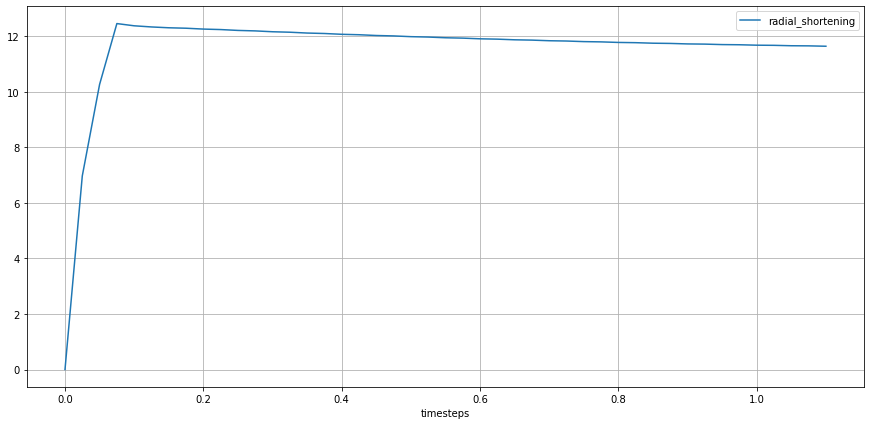

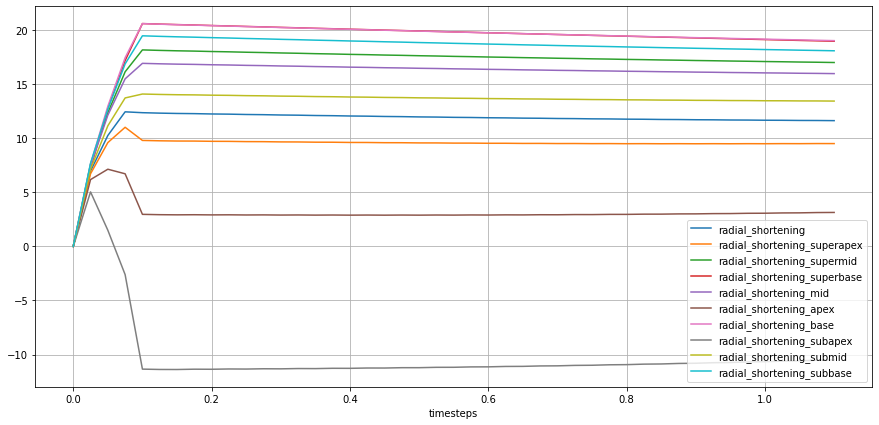

In [10]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
# circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.radial_shortening(circ_spks, t_ed=0.0, recompute=True, reduce_by={"name"})
lv.plot_metric(lv.STATES.RADIAL_SHORTENING, 
    from_ts=0.0,
    plot_infos=["name"])

Wall thickening:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.WALL_THICKNESS'
DEBUG:LV.BaseMetricsComputations:Reducing metric by name for 'LV_STATES.WALL_THICKNESS'
INFO:LV.BaseMetricsComputations:Metric 'LV_STATES.WALL_THICKNESS' has reduced values by names.
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.WALL_THICKENING'
DEBUG:LV.BaseMetricsComputations:Reducing metric by name for 'LV_STATES.WALL_THICKENING'
INFO:LV.BaseMetricsComputations:Metric 'LV_STATES.WALL_THICKENING' has reduced values by names.


suffix 'epi' not found for metric 'wall_thickening': wall_thickening_epi
suffix 'epi_subbase' not found for metric 'wall_thickening': wall_thickening_epi_subbase
suffix 'epi_apex' not found for metric 'wall_thickening': wall_thickening_epi_apex
suffix 'epi_base' not found for metric 'wall_thickening': wall_thickening_epi_base
suffix 'epi_supermid' not found for metric 'wall_thickening': wall_thickening_epi_supermid
suffix 'epi_submid' not found for metric 'wall_thickening': wall_thickening_epi_submid
suffix 'epi_superbase' not found for metric 'wall_thickening': wall_thickening_epi_superbase
suffix 'epi_subapex' not found for metric 'wall_thickening': wall_thickening_epi_subapex
suffix 'epi_superapex' not found for metric 'wall_thickening': wall_thickening_epi_superapex
suffix 'epi_mid' not found for metric 'wall_thickening': wall_thickening_epi_mid


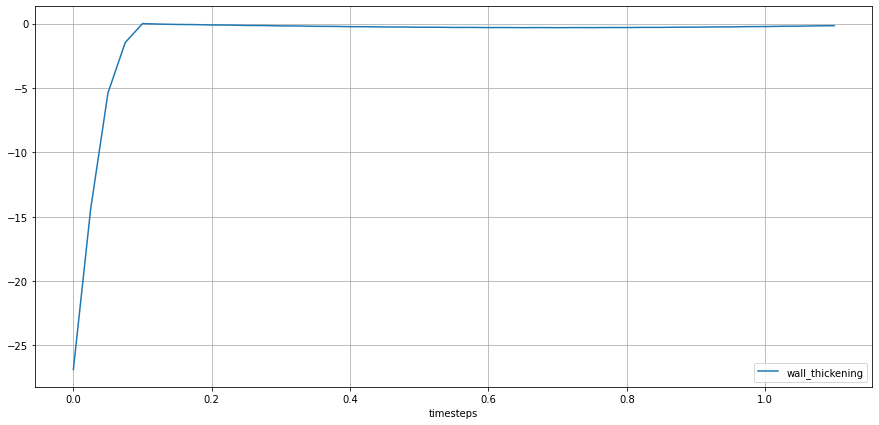

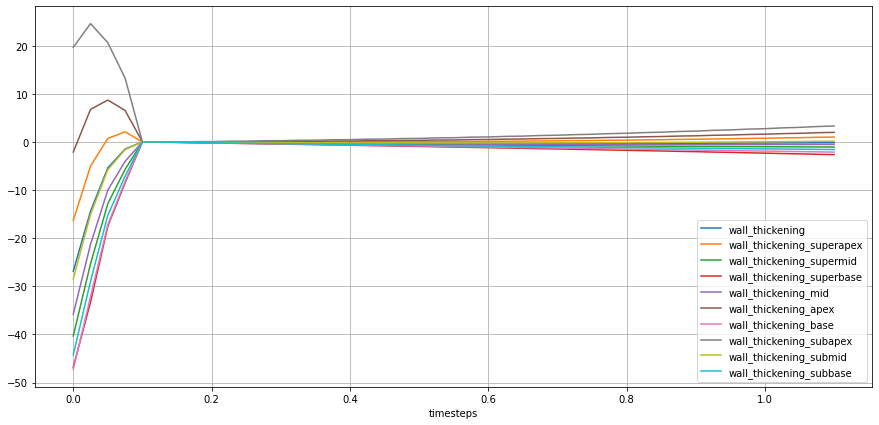

In [11]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.wall_thickening(endo_circ_spks, epi_circ_spks, t_ed=0.1, recompute=True, reduce_by={"name"})
lv.plot_metric(lv.STATES.WALL_THICKENING, 
    from_ts=0.0,
    plot_infos=["name"])

Longitudinal strain:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.LONG_LENGTH'
DEBUG:LV.BaseMetricsComputations:res_group.keys() 'dict_keys([('endo', '0'), ('epi', '0'), ('endo', '1'), ('epi', '1'), ('endo', '2'), ('epi', '2'), ('endo', '3'), ('epi', '3'), ('endo', '4'), ('epi', '4'), ('endo', '5'), ('epi', '5')])'
DEBUG:LV.BaseMetricsComputations:res_by_name.keys() 'dict_keys(['0', '1', '2', '3', '4', '5'])'
DEBUG:LV.BaseMetricsComputations:res_by_group.keys() 'dict_keys(['endo', 'epi'])'
DEBUG:LV.BaseMetricsComputations:Reducing metric by group and name for 'LV_STATES.LONG_LENGTH'
DEBUG:LV.BaseMetricsComputations:groupkey 'endo''
DEBUG:LV.BaseMetricsComputations:statekey 'longitudinal_length_endo''
DEBUG:LV.BaseMetricsComputations:groupkey 'epi''
DEBUG:LV.BaseMetricsComputations:statekey 'longitudinal_length_epi''
INFO:LV.BaseMetricsComputations:Metric 'LV_STATES.LONG_LENGTH' has reduced values by group and name.
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.LONGITUDINAL_STRA

suffix '1' not found for metric 'longitudinal_strain': longitudinal_strain_1
suffix '5' not found for metric 'longitudinal_strain': longitudinal_strain_5
suffix '4' not found for metric 'longitudinal_strain': longitudinal_strain_4
suffix '3' not found for metric 'longitudinal_strain': longitudinal_strain_3
suffix '2' not found for metric 'longitudinal_strain': longitudinal_strain_2
suffix '0' not found for metric 'longitudinal_strain': longitudinal_strain_0
suffix 'endo_0' not found for metric 'longitudinal_strain': longitudinal_strain_endo_0
suffix 'endo_2' not found for metric 'longitudinal_strain': longitudinal_strain_endo_2
suffix 'epi_2' not found for metric 'longitudinal_strain': longitudinal_strain_epi_2
suffix 'epi_4' not found for metric 'longitudinal_strain': longitudinal_strain_epi_4
suffix 'endo_5' not found for metric 'longitudinal_strain': longitudinal_strain_endo_5
suffix 'epi_5' not found for metric 'longitudinal_strain': longitudinal_strain_epi_5
suffix 'endo_1' not fo

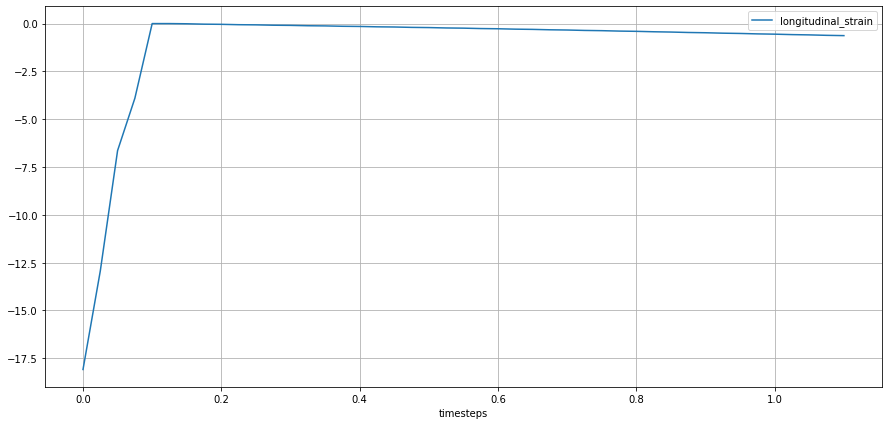

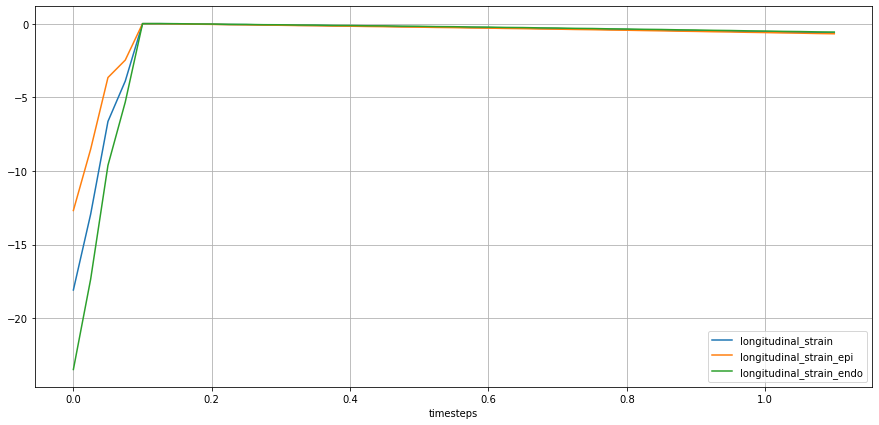

In [22]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_strain(long_spks, t_ed=0.1, mfilter_ws=0, sfilter_ws=0, recompute=True)
lv.plot_metric(lv.STATES.SL, 
    from_ts=0.0,
    plot_infos=["group"])

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.LONG_LENGTH'
DEBUG:LV.BaseMetricsComputations:res_group.keys() 'dict_keys([('endo', '0'), ('epi', '0'), ('endo', '1'), ('epi', '1'), ('endo', '2'), ('epi', '2'), ('endo', '3'), ('epi', '3'), ('endo', '4'), ('epi', '4'), ('endo', '5'), ('epi', '5')])'
DEBUG:LV.BaseMetricsComputations:res_by_name.keys() 'dict_keys(['0', '1', '2', '3', '4', '5'])'
DEBUG:LV.BaseMetricsComputations:res_by_group.keys() 'dict_keys(['endo', 'epi'])'
DEBUG:LV.BaseMetricsComputations:Reducing metric by group and name for 'LV_STATES.LONG_LENGTH'
DEBUG:LV.BaseMetricsComputations:groupkey 'endo''
DEBUG:LV.BaseMetricsComputations:statekey 'longitudinal_length_endo''
DEBUG:LV.BaseMetricsComputations:groupkey 'epi''
DEBUG:LV.BaseMetricsComputations:statekey 'longitudinal_length_epi''
INFO:LV.BaseMetricsComputations:Metric 'LV_STATES.LONG_LENGTH' has reduced values by group and name.
INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.LONGITUDINAL_STRA

suffix '1' not found for metric 'longitudinal_strain': longitudinal_strain_1
suffix '5' not found for metric 'longitudinal_strain': longitudinal_strain_5
suffix '4' not found for metric 'longitudinal_strain': longitudinal_strain_4
suffix '3' not found for metric 'longitudinal_strain': longitudinal_strain_3
suffix '2' not found for metric 'longitudinal_strain': longitudinal_strain_2
suffix '0' not found for metric 'longitudinal_strain': longitudinal_strain_0
suffix 'endo_0' not found for metric 'longitudinal_strain': longitudinal_strain_endo_0
suffix 'endo_2' not found for metric 'longitudinal_strain': longitudinal_strain_endo_2
suffix 'epi_2' not found for metric 'longitudinal_strain': longitudinal_strain_epi_2
suffix 'epi_4' not found for metric 'longitudinal_strain': longitudinal_strain_epi_4
suffix 'endo_5' not found for metric 'longitudinal_strain': longitudinal_strain_endo_5
suffix 'epi_5' not found for metric 'longitudinal_strain': longitudinal_strain_epi_5
suffix 'endo_1' not fo

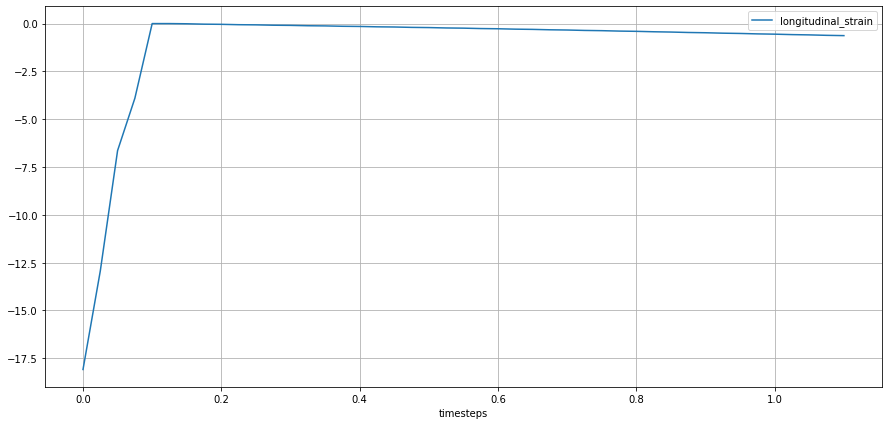

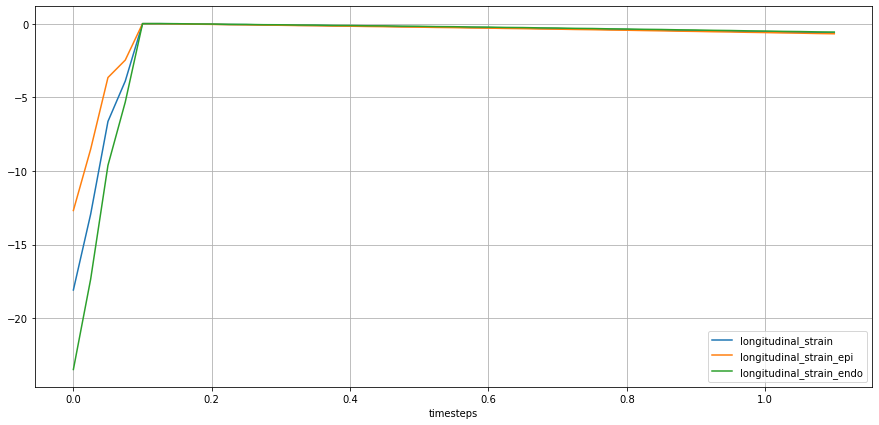

In [36]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_strain(long_spks, t_ed=0.1, mfilter_ws=0, sfilter_ws=0, sfilter_or=0, recompute=True)
lv.plot_metric(lv.STATES.SL, 
    from_ts=0.0,
    plot_infos=["group"])

Circumferential Strain:

In [13]:
circ_spks.by("group").keys()

dict_keys(['endo', 'epi'])

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.CIRC_LENGTH'
DEBUG:LV.BaseMetricsComputations:res_group '{('endo', 'subapex'): deque([array([69.12824631, 61.70301723, 55.31779099, 50.82719994, 45.82813692,
       45.84645081, 45.86683369, 45.88973856, 45.90978575, 45.93244028,
       45.95231628, 45.97483492, 45.99462795, 46.01707363, 46.03682899,
       46.05923271, 46.078969  , 46.10134602, 46.12107229, 46.16990089,
       46.18964243, 46.21198368, 46.23171139, 46.25402069, 46.27372456,
       46.29598951, 46.31566381, 46.33787537, 46.357512  , 46.37966204,
       46.39924574, 46.4213233 , 46.44085026, 46.46284294, 46.48230314,
       46.50419664, 46.5235796 , 46.54536772, 46.56466389, 46.58633232,
       46.60553122, 46.6270709 , 46.64616251, 46.66756248, 46.68653679])]), ('epi', 'subapex'): deque([array([125.10493469, 122.00588608, 119.39246941, 117.4376049 ,
       116.07067871, 116.07799911, 116.09114265, 116.11165428,
       116.12424088, 116.14448357, 116.15707588, 

suffix 'superapex' not found for metric 'circumferential_strain': circumferential_strain_superapex
suffix 'supermid' not found for metric 'circumferential_strain': circumferential_strain_supermid
suffix 'superbase' not found for metric 'circumferential_strain': circumferential_strain_superbase
suffix 'mid' not found for metric 'circumferential_strain': circumferential_strain_mid
suffix 'apex' not found for metric 'circumferential_strain': circumferential_strain_apex
suffix 'base' not found for metric 'circumferential_strain': circumferential_strain_base
suffix 'subapex' not found for metric 'circumferential_strain': circumferential_strain_subapex
suffix 'submid' not found for metric 'circumferential_strain': circumferential_strain_submid
suffix 'subbase' not found for metric 'circumferential_strain': circumferential_strain_subbase
suffix 'epi_subbase' not found for metric 'circumferential_strain': circumferential_strain_epi_subbase
suffix 'endo_supermid' not found for metric 'circumfer

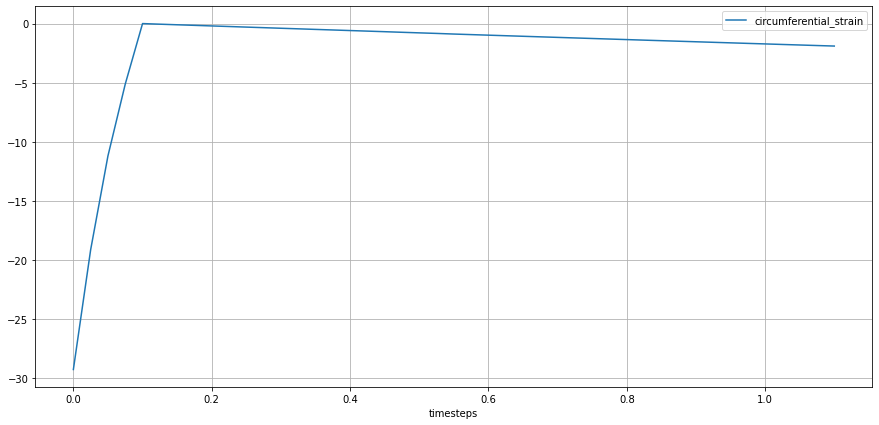

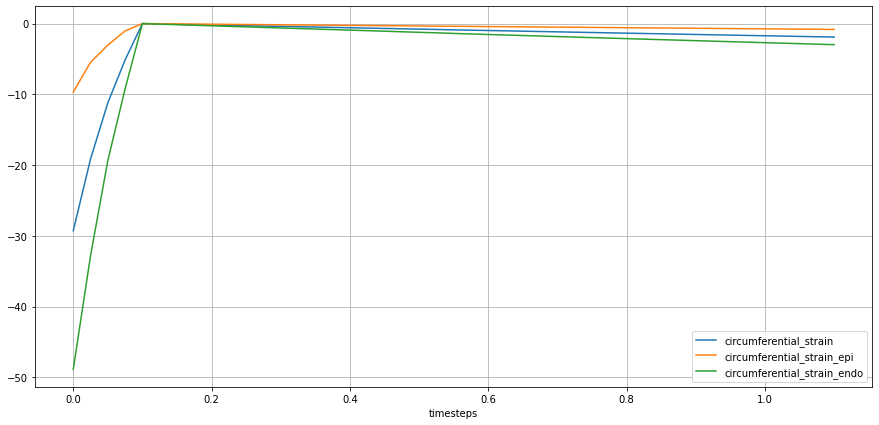

In [14]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.circumferential_strain(circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.SC, 
    from_ts=0.0,
    plot_infos=["group"])

Twist:

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.ROTATION'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (86, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 86, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (75, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 75, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (86, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 86, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (79, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 79, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (75, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 75, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.B

suffix 'base' not found for metric 'twist': twist_base
suffix 'endo_base' not found for metric 'twist': twist_endo_base
suffix 'epi_base' not found for metric 'twist': twist_epi_base


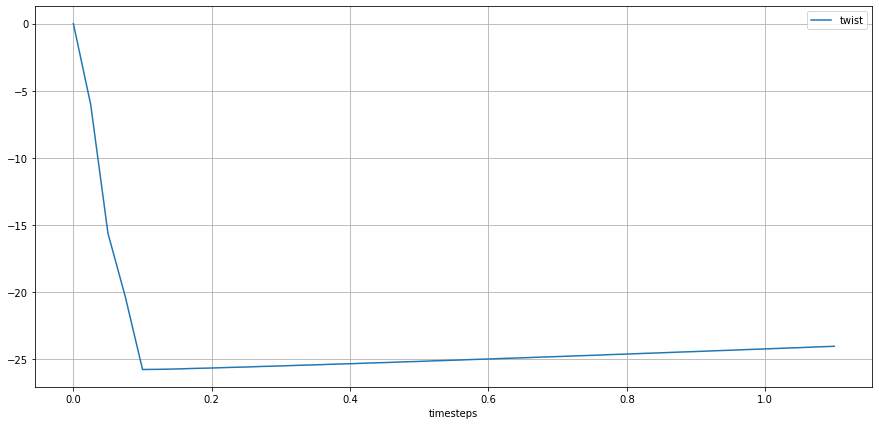

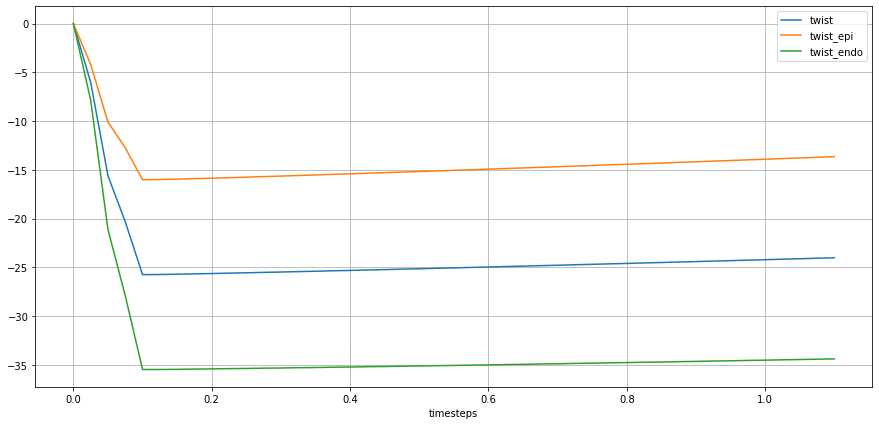

In [15]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.twist(apex_spks, base_spks, t_ed=0.1, recompute=True, reduce_by={"group"})
lv.plot_metric(lv.STATES.TW, 
    from_ts=0.0,
    plot_infos=["group"])

Torsion:

In [16]:
apex_spks.by("group").keys()

dict_keys(['endo', 'epi'])

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.ROTATION'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (86, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 86, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (75, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 75, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (86, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 86, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (79, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 79, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.BaseMetricsComputations:rot:' p_ref.shape (75, 3)'
DEBUG:LV.BaseMetricsComputations:rot:' p_vec.shape (45, 75, 3)'
DEBUG:LV.BaseMetricsComputations:rot: rot_vec.shape '(45,)'
DEBUG:LV.B

suffix 'base' not found for metric 'torsion': torsion_base
suffix 'endo_base' not found for metric 'torsion': torsion_endo_base
suffix 'epi_base' not found for metric 'torsion': torsion_epi_base


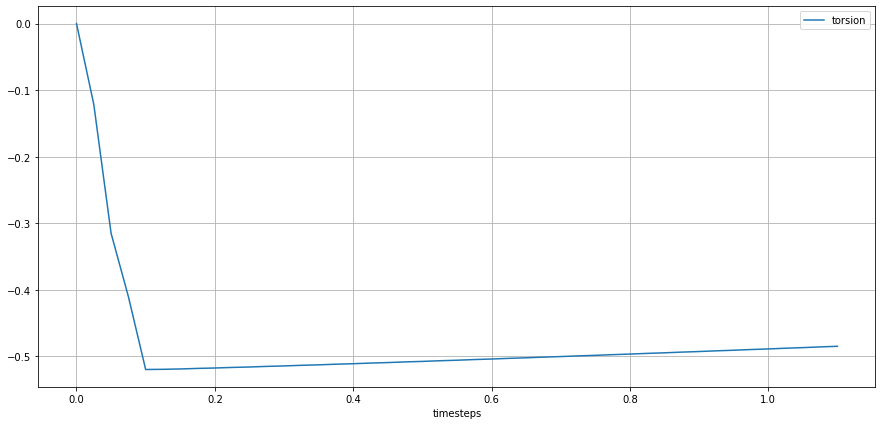

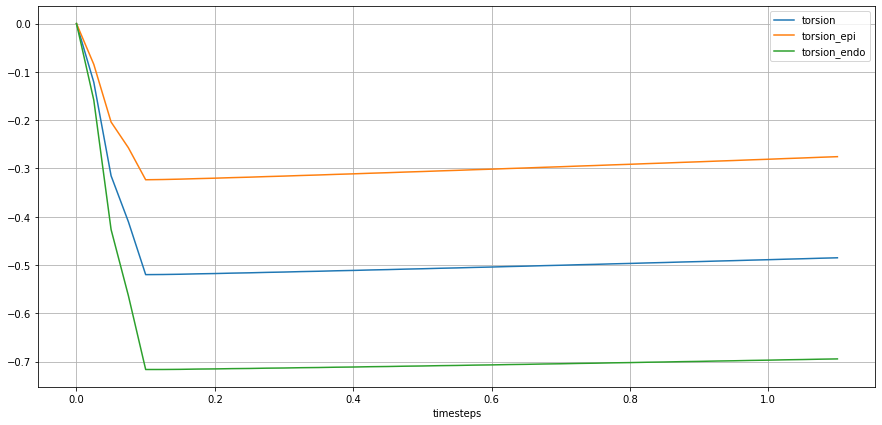

In [17]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.torsion(apex_spks, base_spks, t_ed=0.1, recompute=True, reduce_by={"group"})
lv.plot_metric(lv.STATES.TO, 
    from_ts=0.0,
    plot_infos=["group"])